In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
trainset = pd.read_csv(r"C:\Users\91976\Desktop\programming\AI and Ml\projects\survival predicton\credit\train.csv")
print(trainset.shape)
print(trainset.shape[0] * trainset.shape[1])

(100000, 28)
2800000


# EDA

missing values

In [34]:
features_with_nan = [features for features in trainset.columns if trainset[features].isnull().sum()>=1]
print(features_with_nan)
print(len(features_with_nan))

[]
0


numerical features

In [35]:
numerical_features = [features for features in trainset.columns if trainset[features].dtype!='O']
print(numerical_features)
print(len(numerical_features))

['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
21


In [36]:
discrete_features = [features for features in numerical_features if len(trainset[features].unique()) < 10]

print(discrete_features)
print(len(discrete_features))

['Month']
1


In [37]:
continous_features = [features for features in numerical_features if features not in discrete_features]

print(continous_features)
print(len(continous_features))

['ID', 'Customer_ID', 'Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']
20


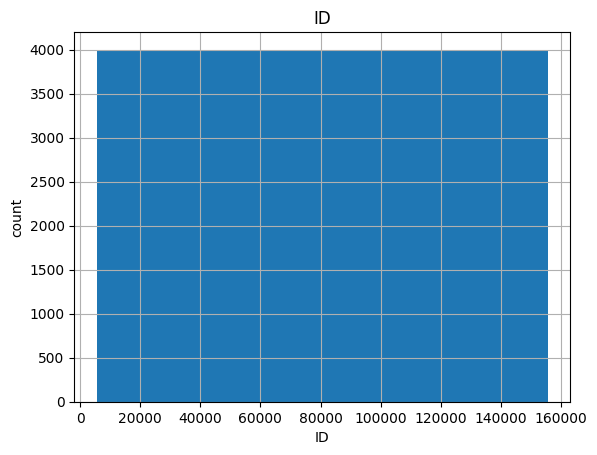

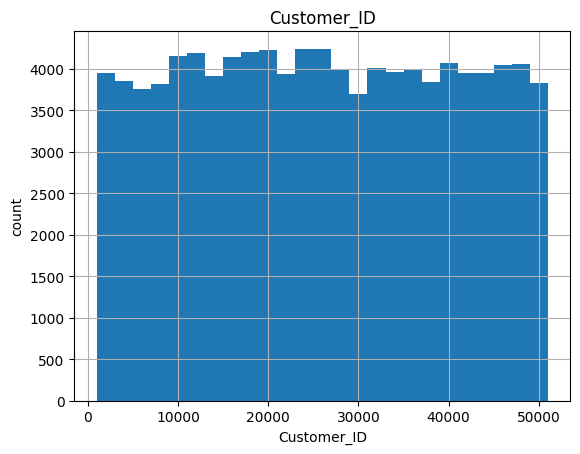

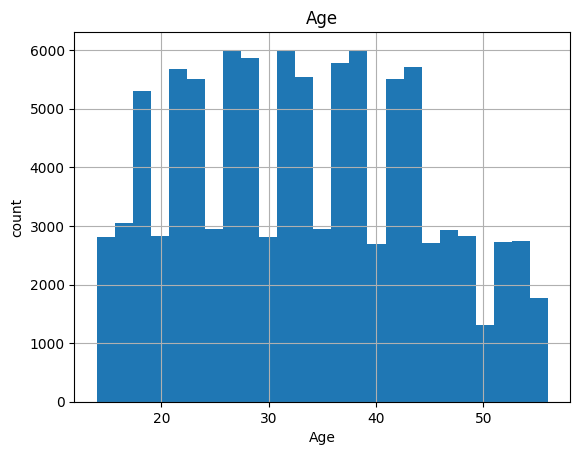

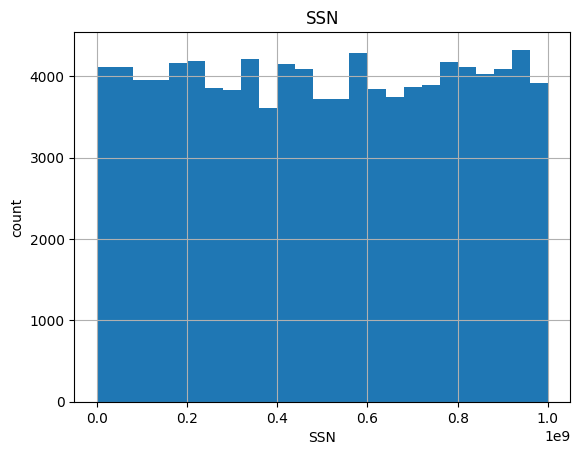

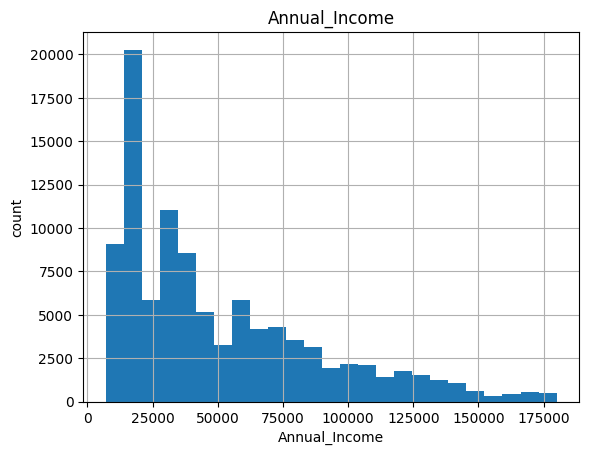

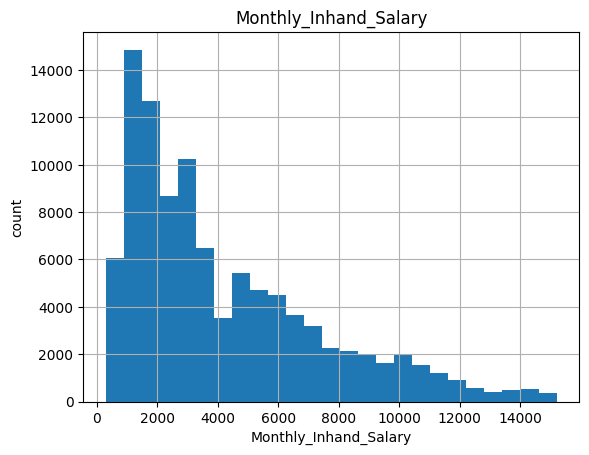

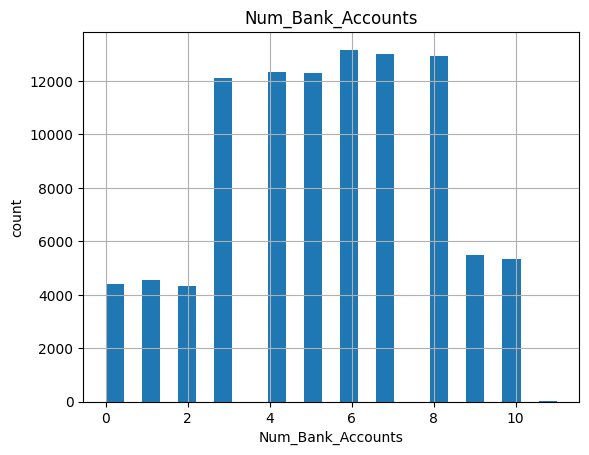

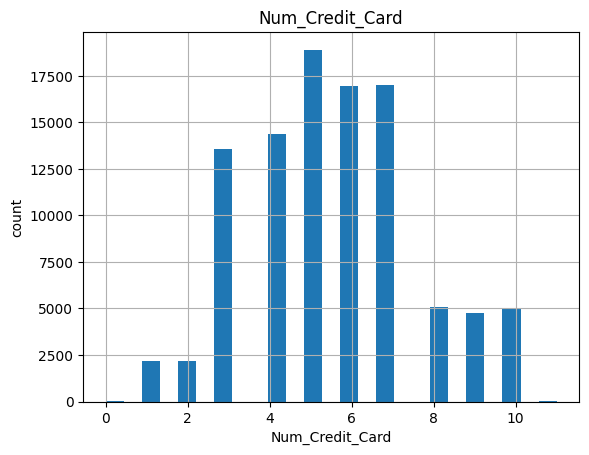

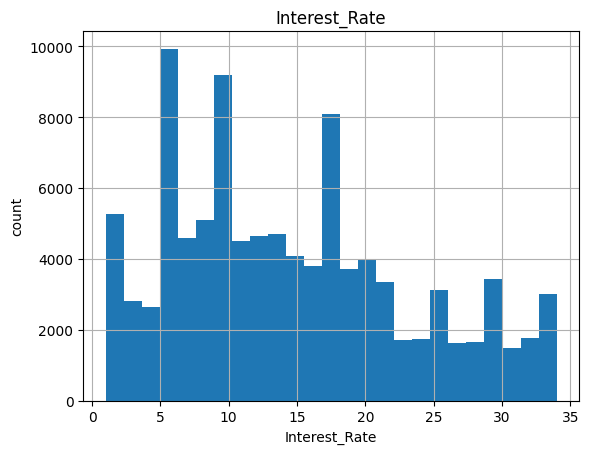

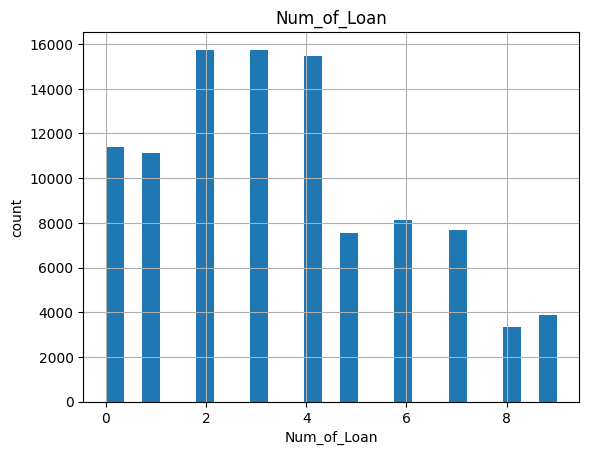

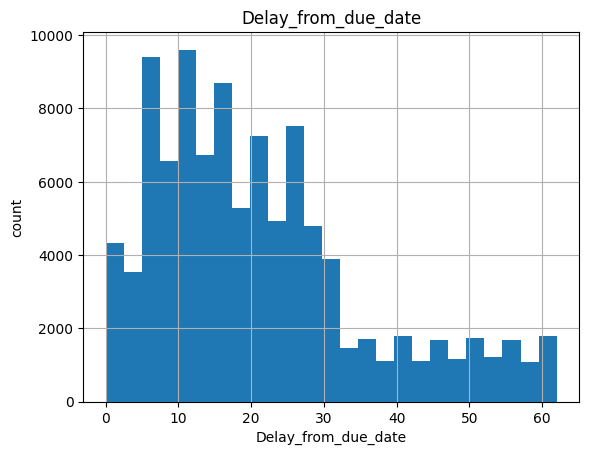

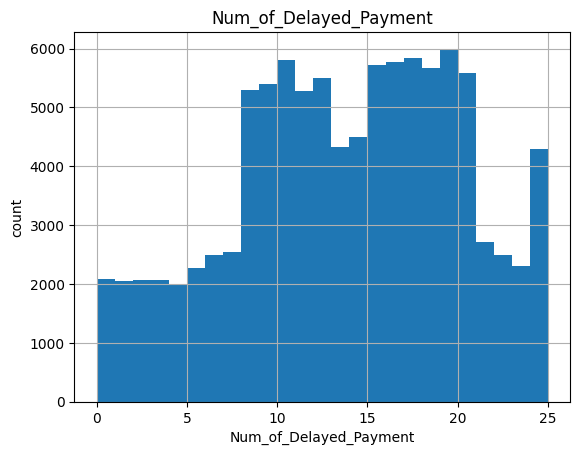

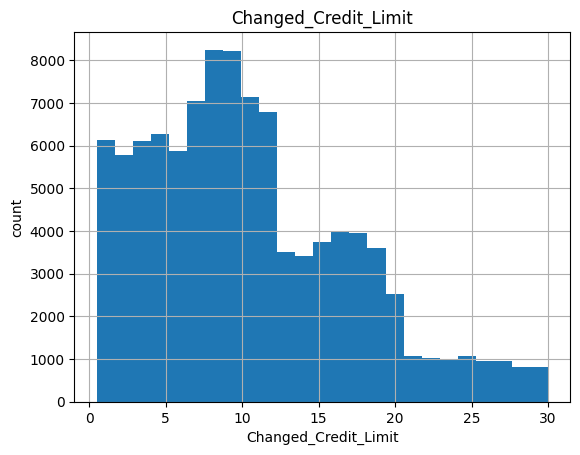

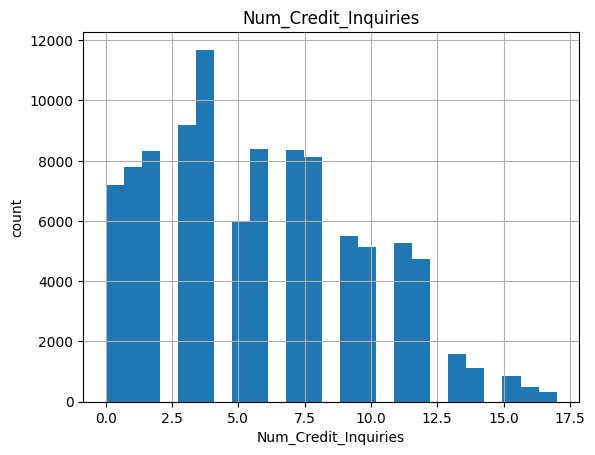

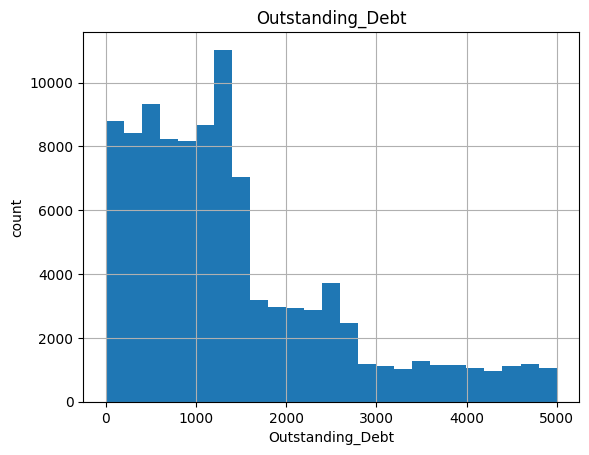

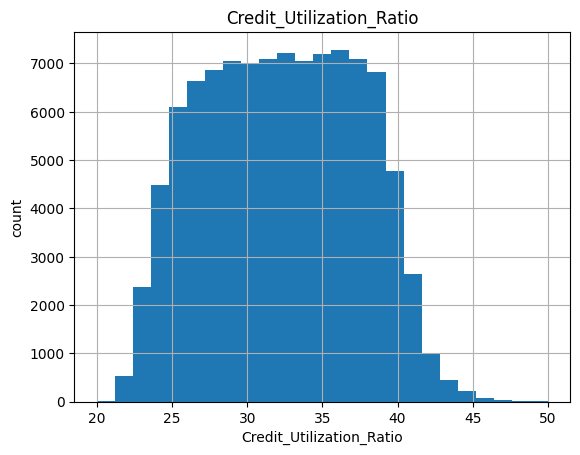

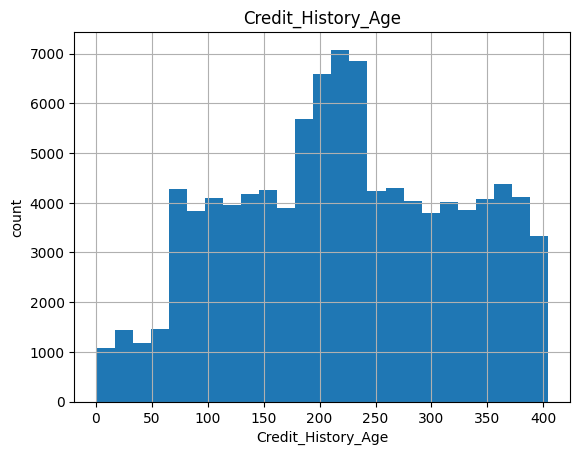

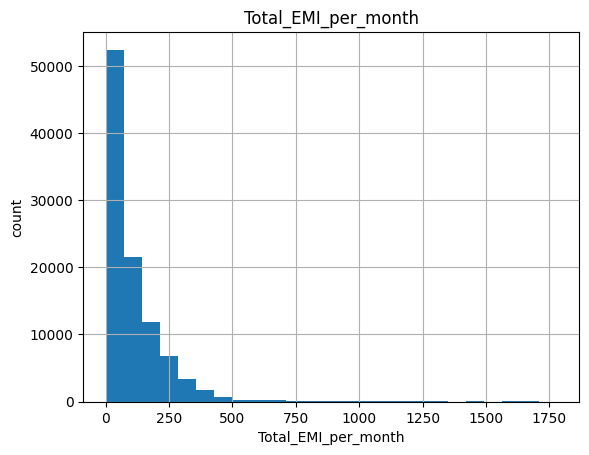

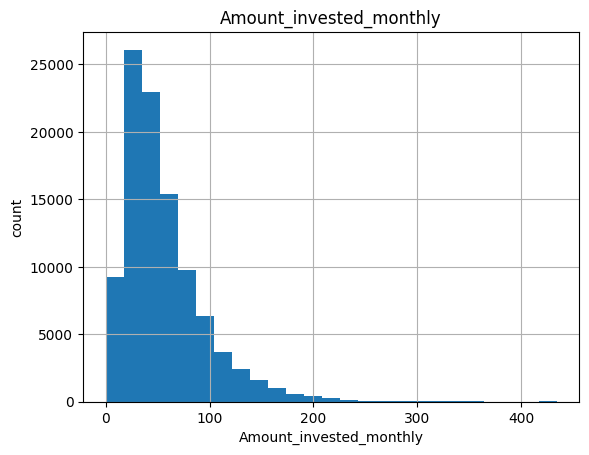

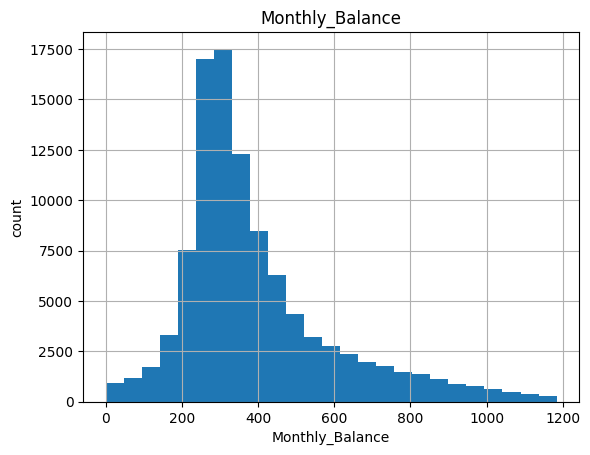

In [38]:
for features in continous_features:
    data = trainset.copy()
    data[features].hist(bins=25)
    plt.xlabel(features)
    plt.ylabel("count")
    plt.title(features)
    plt.show()

categorical features 

In [39]:
categorical_features = [features for features in trainset.columns if trainset[features].dtype=='O']
print(categorical_features)
print(len(categorical_features))

['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
7


In [40]:
for features in categorical_features:
    print(f"The feature is {features} and number of categories are {len(trainset[features].unique())}")

The feature is Name and number of categories are 10128
The feature is Occupation and number of categories are 15
The feature is Type_of_Loan and number of categories are 6261
The feature is Credit_Mix and number of categories are 3
The feature is Payment_of_Min_Amount and number of categories are 3
The feature is Payment_Behaviour and number of categories are 6
The feature is Credit_Score and number of categories are 3


# Feature Engineering

missing values

In [41]:
c_features_na = [features for features in trainset.columns if trainset[features].isnull().sum()>=1 and trainset[features].dtype=='O']

for features in c_features_na:
    print(f"{features}: {np.round(trainset[features].isnull().mean(),4)}% missing values")

In [42]:
n_features_na = [features for features in trainset.columns if trainset[features].isnull().sum()>=1 and trainset[features].dtype!='O']

for features in n_features_na:
    print(f"{features}: {np.round(trainset[features].isnull().mean(),4)}% missing values")


In [43]:
for features in n_features_na:
    median_values = trainset[features].median()
    trainset[features] = trainset[features].fillna(median_values)


print(trainset[n_features_na].isnull().sum())    

Series([], dtype: float64)


In [44]:
corr = trainset.corr()[['Credit_Score']].sort_values(
    by='Credit_Score', ascending=False)

sns.heatmap(corr)

KeyError: "None of [Index(['Credit_Score'], dtype='object')] are in the [columns]"

In [45]:
trainset['Credit_Score'] = trainset['Credit_Score'].replace({'Poor':0 , 'Standard':1 , 'Good':2})


# Model selection

In [46]:
t_x = trainset[['Age','Annual_Income','Monthly_Inhand_Salary','Amount_invested_monthly','Num_Bank_Accounts']]

t_y = trainset['Credit_Score']

print(t_x.shape)
print(t_y.shape)

print(t_y)

(100000, 5)
(100000,)
0        2
1        2
2        2
3        2
4        2
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Credit_Score, Length: 100000, dtype: int64


In [47]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(t_x,t_y,train_size = 0.9)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)


(90000, 5)
(90000,)
(10000, 5)
(10000,)


In [60]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
'''
scalar = MinMaxScaler()
scalar.fit_transform(train_x)
'''

'\nscalar = MinMaxScaler()\nscalar.fit_transform(train_x)\n'

In [61]:

#model = XGBClassifier(objective='multi:softmax')

model = Pipeline([
    ('scalar', MinMaxScaler()),
    ('tech', RandomForestClassifier())
])
'''

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
             'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

search_cv = RandomizedSearchCV(
                estimator=model,
                param_distributions=param_grid,
                n_iter=10,
                cv=5,
                scoring='roc_auc',
                n_jobs=5
)






search_cv.fit(train_x, train_y)
print(search_cv.best_params_)
print(search_cv.best_estimator_)
'''

model.fit(train_x,train_y)

Pipeline(steps=[('scalar', MinMaxScaler()),
                ('xgboost', RandomForestClassifier())])

In [62]:
pred = model.predict(test_x)

acc =  accuracy_score(pred,test_y)
print(acc)

'''
acc_roc = roc_auc_score(pred,test_y)
print(acc_roc)
'''

0.8158


'\nacc_roc = roc_auc_score(pred,test_y)\nprint(acc_roc)\n'

In [63]:
from sklearn.metrics import confusion_matrix
print("For confusion matrix")
print(confusion_matrix(test_y , pred))


from sklearn.metrics import classification_report
print("For classification report:")
print(classification_report(test_y , pred))

For confusion matrix
[[2484  412    1]
 [ 665 4215  436]
 [   2  326 1459]]
For classification report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      2897
           1       0.85      0.79      0.82      5316
           2       0.77      0.82      0.79      1787

    accuracy                           0.82     10000
   macro avg       0.80      0.82      0.81     10000
weighted avg       0.82      0.82      0.82     10000



In [64]:
import pickle

with open('score_model.pkl','wb') as file:
    pickle.dump(model,file)